<font size=48>Machine Learning</font><br>

## Lab02 - Let's PyTorch, Light the Flame of Learning Machine Learning

OBjective:  
- This lab is just to let you have a quick hands-on exposure to another example of more advanced **neural network** using the high-level library called **PyTorch**.

Nevermind if you do not understand YET!

Play around with it to have an idea HOW it works, do not worry if you do not understand WHY it works.

This lab is by YP Wong [<yp@ypwong.net>](mailto:yp@ypwong.net).


## Mount Google Drive

In [1]:
# Uncomment the below if you need to read data from your Google Drive
# Change the notebook_path to where you run the Jupyter Notebook from.

# from google.colab import drive
# import os

# drive.mount('/content/drive')
# notebook_path = r"/content/drive/MyDrive//ML/Labs/Lab01"
# os.chdir(notebook_path)
# !pwd

## Import Packages

In [2]:
# If run from the desktop, use Anaconda to install the below:
#    conda install pytorch torchvision

# Setting random seeds to ensure we have the same results each time we run the code,
#    this is not guaranteed across PyTorch releases.

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from timeit import default_timer as timer

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Load Training Data of FMNIST Datasets from TorchVision

In [3]:
from torchvision import datasets, transforms

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training data and load training data
training_data = datasets.FashionMNIST('~/.pytorch/FMNIST/',
                                      download = True, train = True,
                                      transform = transform
                                     )

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.3MB/s]


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 205kB/s]


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.82MB/s]


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.65MB/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



## Understanding and Explore the Training Data


In [4]:
print("Size of training_data =", len(training_data))
print("type(training_data[0][0]) =", type(training_data[0][0]))   # image
print("type(training_data[0][1]) =", type(training_data[0][1]))   # label (integer)

print("training_data[0][0].size() =", training_data[0][0].size())

Size of training_data = 60000
type(training_data[0][0]) = <class 'torch.Tensor'>
type(training_data[0][1]) = <class 'int'>
training_data[0][0].size() = torch.Size([1, 28, 28])


In [5]:
FMNIST_labels_map = ['T-shirt','Trouser','Pullover','Dress','Coat',
                     'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

def get_FMNIST_label_name(label):
  label_name = FMNIST_labels_map[label]
  return label_name

def print_FMNIST_label_name(index, label):
  label_name = get_FMNIST_label_name(label)
  print(f"Label name for sample with index {index} = {label_name}")

def show_FMNIST_image(image):
  plt.imshow(image.squeeze(), cmap = 'gray')

Label name for sample with index 17 = T-shirt



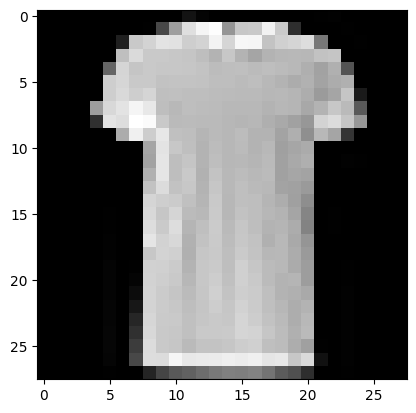

In [6]:
# TODO: try different number,
#       must be from 0 to 59999 for traing_data and from 0 to 9999 for testing_data
sample_image_index = 17

sample_image, sample_image_label = training_data[sample_image_index]

print_FMNIST_label_name(sample_image_index, sample_image_label)
print()
show_FMNIST_image(sample_image)

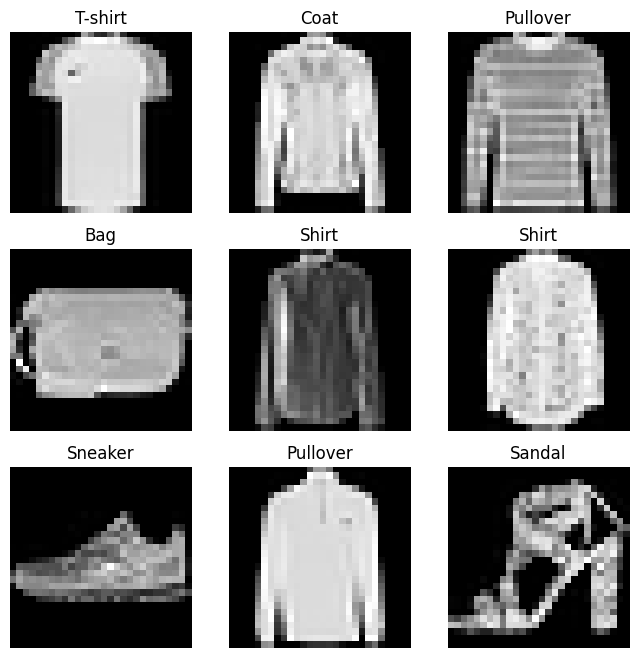

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]

    figure.add_subplot(rows, cols, i)

    label_name = get_FMNIST_label_name(label)
    plt.title(label_name)

    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Understanding and Explore the DataLoader

In [8]:
# Prepare Training Data with DataLoaders
train_dataloader = torch.utils.data.DataLoader(training_data,
                                               batch_size = 64,
                                               shuffle = False
                                              )

# Load one batch of training data
training_batch_images, training_batch_labels = next(iter(train_dataloader))

print("len(training_batch_images) =", len(training_batch_images))
print("len(training_batch_labels) =", len(training_batch_labels))

print("type(training_batch_images) =", type(training_batch_images))
print("type(training_batch_labels) =", type(training_batch_labels))

print("training_batch_images.shape =", training_batch_images.shape)
print("training_batch_labels.shape =", training_batch_labels.shape)

len(training_batch_images) = 64
len(training_batch_labels) = 64
type(training_batch_images) = <class 'torch.Tensor'>
type(training_batch_labels) = <class 'torch.Tensor'>
training_batch_images.shape = torch.Size([64, 1, 28, 28])
training_batch_labels.shape = torch.Size([64])


Label name for sample with index 17 = T-shirt



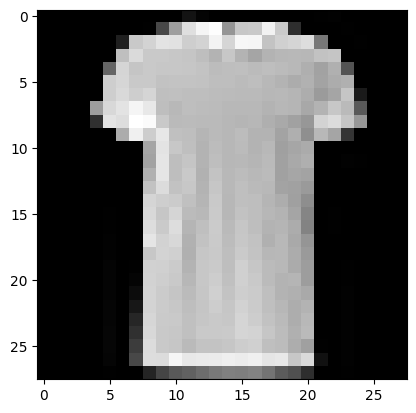

In [9]:
# TODO: try different number,
#       must be from 0 to 59999 for traing_data and from 0 to 9999 for testing_data
sample_image_index = 17

sample_image       = training_batch_images[sample_image_index]
sample_image_label = training_batch_labels[sample_image_index]

print_FMNIST_label_name(sample_image_index, sample_image_label)
print()
show_FMNIST_image(sample_image)

## Discussion

Q: What is the size of an image?  
A:


## Build a PyTorch `Sequential` Model


In [10]:
def create_sequential_model():
  return nn.Sequential(nn.Flatten(start_dim = 1, end_dim = -1),
                       nn.Linear(784, 128),
                       nn.ReLU(),
                       nn.Linear(128,  64),
                       nn.ReLU(),
                       nn.Linear( 64,  10),
                       nn.LogSoftmax(dim = 1))

## Build a PyTorch `nn.Module` Model

- This is alternative to the PyTorch `Sequential` model
- Sequential is a subclass of `nn.Module`

In [11]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,  64)
    self.fc3 = nn.Linear( 64,  10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)

    return x

## Define the Training Function

In [12]:
def train(model, batch_size):

  print("Training: ", end = "")

  criterion = nn.NLLLoss()
  optimizer = optim.SGD(model.parameters(), lr = 0.01)

  train_dataloader = torch.utils.data.DataLoader(training_data,
                                                 batch_size = batch_size,
                                                 shuffle = False
                                                )

  total_batches = int(len(training_data) / batch_size + 0.5)  # round up to integer

  start = timer()

  cum_loss = 0

  for batch_num, (images, labels) in enumerate(train_dataloader, 1):
      optimizer.zero_grad()
      output = model(images)
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()

      print(f"{batch_num}/{total_batches}:{loss.item()} ", end = "")

      cum_loss += loss.item()

  training_loss = cum_loss/len(train_dataloader)

  time_taken = timer() - start
  print()
  print(f"Training loss = {training_loss} ", end = "")
  print("Time taken =", time_taken)

  return training_loss

## Train a PyTorch `Sequential` Model

In [13]:
torch.manual_seed(0)
np.random.seed(0)

sequential_model = create_sequential_model()

train(model = sequential_model, batch_size = 64)
train(model = sequential_model, batch_size = 64)

Training: 1/938:2.2915170192718506 2/938:2.3351223468780518 3/938:2.3156301975250244 4/938:2.289105176925659 5/938:2.3147389888763428 6/938:2.2893311977386475 7/938:2.2852628231048584 8/938:2.286841630935669 9/938:2.295656204223633 10/938:2.2886836528778076 11/938:2.2649617195129395 12/938:2.272710084915161 13/938:2.272156238555908 14/938:2.2652835845947266 15/938:2.267263650894165 16/938:2.272552728652954 17/938:2.2412021160125732 18/938:2.276860475540161 19/938:2.2560007572174072 20/938:2.253089666366577 21/938:2.2159674167633057 22/938:2.2651803493499756 23/938:2.213371992111206 24/938:2.2538321018218994 25/938:2.2176129817962646 26/938:2.2446889877319336 27/938:2.221074104309082 28/938:2.2219488620758057 29/938:2.209291934967041 30/938:2.2077083587646484 31/938:2.241795063018799 32/938:2.216263771057129 33/938:2.1910738945007324 34/938:2.1810030937194824 35/938:2.211613416671753 36/938:2.186906099319458 37/938:2.1569528579711914 38/938:2.182422161102295 39/938:2.1799159049987793 40

0.5614933911988984

## Train a PyTorch `nn.Module` Model

In [14]:
torch.manual_seed(0)
np.random.seed(0)

nn_module_model = FMNIST()

train(model = nn_module_model, batch_size = 64)
train(model = nn_module_model, batch_size = 64)

Training: 1/938:2.2915170192718506 2/938:2.3351223468780518 3/938:2.3156301975250244 4/938:2.289105176925659 5/938:2.3147389888763428 6/938:2.2893311977386475 7/938:2.2852628231048584 8/938:2.286841630935669 9/938:2.295656204223633 10/938:2.2886836528778076 11/938:2.2649617195129395 12/938:2.272710084915161 13/938:2.272156238555908 14/938:2.2652835845947266 15/938:2.267263650894165 16/938:2.272552728652954 17/938:2.2412021160125732 18/938:2.276860475540161 19/938:2.2560007572174072 20/938:2.253089666366577 21/938:2.2159674167633057 22/938:2.2651803493499756 23/938:2.213371992111206 24/938:2.2538321018218994 25/938:2.2176129817962646 26/938:2.2446889877319336 27/938:2.221074104309082 28/938:2.2219488620758057 29/938:2.209291934967041 30/938:2.2077083587646484 31/938:2.241795063018799 32/938:2.216263771057129 33/938:2.1910738945007324 34/938:2.1810030937194824 35/938:2.211613416671753 36/938:2.186906099319458 37/938:2.1569528579711914 38/938:2.182422161102295 39/938:2.1799159049987793 40

0.5614933911988984

## Load, Understand and Understand the Test Data of FMNIST Datasets from TorchVision

In [15]:
mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST test dataset and load test data
testing_data = datasets.FashionMNIST('~/.pytorch/FMNIST/',
                                     download = True, train = False,
                                     transform = transform
                                    )

In [16]:
print("Size of testing_data =", len(testing_data))
print("type(testing_data[0][0]) =", type(testing_data[0][0]))   # image
print("type(testing_data[0][1]) =", type(testing_data[0][1]))   # label (integer)

print("testing_data[0][0].size() =", testing_data[0][0].size())

Size of testing_data = 10000
type(testing_data[0][0]) = <class 'torch.Tensor'>
type(testing_data[0][1]) = <class 'int'>
testing_data[0][0].size() = torch.Size([1, 28, 28])


## Test the Model with a Sample Test Data

Label name for sample with index 127 = Coat



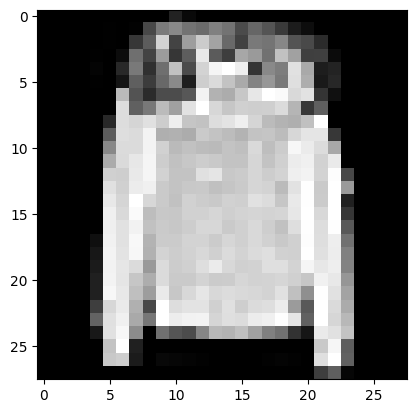

In [17]:
# TODO: try different number,
#       must be from 0 to 59999 for traing_data and from 0 to 9999 for testing_data
sample_image_index = 127

sample_image, sample_image_label = testing_data[sample_image_index]

print_FMNIST_label_name(sample_image_index, sample_image_label)
print()
show_FMNIST_image(sample_image)

In [18]:
with torch.no_grad(): # perform inference/evaluation without computing gradients or storing intermediate values
  logps = sequential_model(sample_image) # log probabilities

ps = torch.exp(logps) # probabilities

print("logps =", logps)
print("ps =", ps)

nps = ps.numpy()[0] # in numpy list
print("nps =", nps)

logps = tensor([[ -7.7629,  -8.3942,  -1.2860,  -7.2746,  -0.4454, -10.6519,  -2.5969,
         -14.6740,  -4.9346, -11.9446]])
ps = tensor([[4.2523e-04, 2.2616e-04, 2.7638e-01, 6.9290e-04, 6.4055e-01, 2.3655e-05,
         7.4505e-02, 4.2380e-07, 7.1934e-03, 6.4939e-06]])
nps = [4.2523327e-04 2.2616470e-04 2.7637735e-01 6.9290400e-04 6.4054877e-01
 2.3654718e-05 7.4505478e-02 4.2379662e-07 7.1933935e-03 6.4939341e-06]


<BarContainer object of 10 artists>

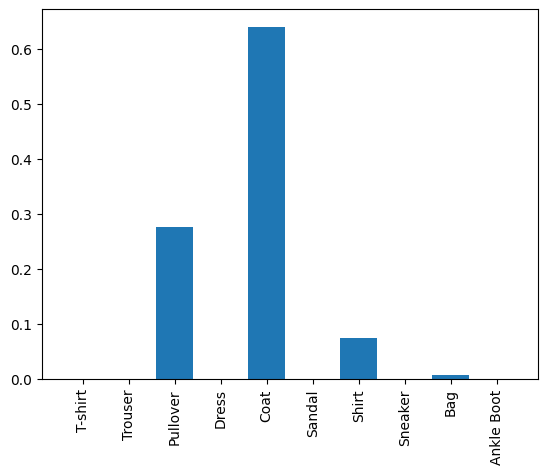

In [19]:
plt.xticks(np.arange(10), labels = FMNIST_labels_map, rotation = 'vertical')

plt.bar(np.arange(10), nps)

## Test the Model with All Test Data

In [20]:
def test(model, batch_size):

  print("Testing: ", end = "")

  criterion = nn.NLLLoss()

  test_dataloader = torch.utils.data.DataLoader(testing_data,
                                                batch_size = batch_size,
                                                shuffle = False
                                               )

  start = timer()

  cum_loss = 0

  for batch_num, (images, labels) in enumerate(test_dataloader, 1):
    output = model(images)
    loss = criterion(output, labels)

    cum_loss += loss.item()

  testing_loss = cum_loss/len(test_dataloader)

  time_taken = timer() - start

  print(f"Testing loss = {testing_loss} ", end = "")
  print("Time taken =", time_taken)

  return testing_loss

In [21]:
test(model = sequential_model, batch_size = 64)

Testing: Testing loss = 0.5420356802879625 Time taken = 2.2352835459999767


0.5420356802879625

## Training and Testing

In [22]:
torch.manual_seed(0)
np.random.seed(0)

sequential_model = create_sequential_model()

num_epochs = 20
batch_size = 64

training_losses = []
testing_losses = []

for i in range(1, num_epochs + 1):

  print(f"Epoch {i}/{num_epochs} => ")

  training_loss = train(model = sequential_model, batch_size = batch_size)
  testing_loss  = test( model = sequential_model, batch_size = batch_size)

  training_losses.append(training_loss)
  testing_losses.append(testing_loss)

  print(f"Epoch {i}/{num_epochs} training loss = {training_loss} testing loss = {testing_loss}")

print(training_losses)
print(testing_losses)

Epoch 1/20 => 
Training: 1/938:2.2915170192718506 2/938:2.3351223468780518 3/938:2.3156301975250244 4/938:2.289105176925659 5/938:2.3147389888763428 6/938:2.2893311977386475 7/938:2.2852628231048584 8/938:2.286841630935669 9/938:2.295656204223633 10/938:2.2886836528778076 11/938:2.2649617195129395 12/938:2.272710084915161 13/938:2.272156238555908 14/938:2.2652835845947266 15/938:2.267263650894165 16/938:2.272552728652954 17/938:2.2412021160125732 18/938:2.276860475540161 19/938:2.2560007572174072 20/938:2.253089666366577 21/938:2.2159674167633057 22/938:2.2651803493499756 23/938:2.213371992111206 24/938:2.2538321018218994 25/938:2.2176129817962646 26/938:2.2446889877319336 27/938:2.221074104309082 28/938:2.2219488620758057 29/938:2.209291934967041 30/938:2.2077083587646484 31/938:2.241795063018799 32/938:2.216263771057129 33/938:2.1910738945007324 34/938:2.1810030937194824 35/938:2.211613416671753 36/938:2.186906099319458 37/938:2.1569528579711914 38/938:2.182422161102295 39/938:2.1799

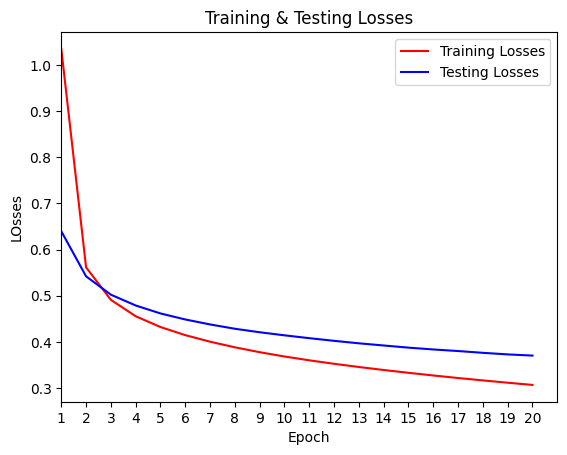

In [23]:
x = list( range(1, num_epochs + 1) )
x_range = (1, num_epochs + 1)

plt.xticks(range(1, num_epochs + 1, 1))

plt.plot(x, training_losses, color = "r", label = "Training Losses")
plt.plot(x, testing_losses,  color = "b", label = "Testing Losses")

plt.locator_params(axis='y', nbins=10)

plt.xlim(x_range)

plt.xlabel("Epoch")
plt.ylabel("LOsses")
plt.title("Training & Testing Losses")
plt.legend()
plt.show()

## Working with GPUs

In Google Colab, go to the menu "Runtime -> Change run time type" to set the "Hardware accelerator" to "GPU"

In [24]:
# NVIDIA (R) Cuda compiler driver
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [25]:
# NVIDIA System Management Interface (nvidia-smi)
!nvidia-smi

Sun Nov 10 17:14:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
# Refer to https://pytorch.org/get-started/locally/
# conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [27]:
def train(model, batch_size, use_gpu = False):

  print("use_gpu =", use_gpu)
  print("Training: ", end = "")

  criterion = nn.NLLLoss()
  optimizer = optim.SGD(model.parameters(), lr = 0.01)

  train_dataloader = torch.utils.data.DataLoader(training_data,
                                                 batch_size = batch_size,
                                                 shuffle = False
                                                )

  total_batches = int(len(training_data) / batch_size + 0.5)  # round up to integer

  start = timer()

  cum_loss = 0

  for batch_num, (images, labels) in enumerate(train_dataloader, 1):
      optimizer.zero_grad()

      if (use_gpu == True):
        # Move data to GPU
        images = images.to(device)
        labels = labels.to(device)

      output = model(images)
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()

      print(f"{batch_num}/{total_batches}:{loss.item()} ", end = "")

      cum_loss += loss.item()

  training_loss = cum_loss/len(train_dataloader)

  time_taken = timer() - start
  print()
  print(f"Training loss = {training_loss} ", end = "")
  print("Time taken =", time_taken)

  return training_loss

In [28]:
torch.manual_seed(0)
np.random.seed(0)

sequential_model_gpu = create_sequential_model()

# Move model to GPU
sequential_model_gpu.to(device)

# Train model in GPU
train(model = sequential_model_gpu, batch_size = 64, use_gpu = True)
train(model = sequential_model_gpu, batch_size = 64, use_gpu = True)

use_gpu = True
Training: 1/938:2.291517734527588 2/938:2.3351223468780518 3/938:2.3156299591064453 4/938:2.2891054153442383 5/938:2.3147389888763428 6/938:2.2893307209014893 7/938:2.2852630615234375 8/938:2.286841869354248 9/938:2.295656442642212 10/938:2.2886836528778076 11/938:2.2649614810943604 12/938:2.2727105617523193 13/938:2.272156238555908 14/938:2.2652838230133057 15/938:2.267263412475586 16/938:2.272552728652954 17/938:2.2412023544311523 18/938:2.276860475540161 19/938:2.2560007572174072 20/938:2.253089666366577 21/938:2.2159674167633057 22/938:2.2651803493499756 23/938:2.213371515274048 24/938:2.2538325786590576 25/938:2.2176129817962646 26/938:2.2446892261505127 27/938:2.221074342727661 28/938:2.2219488620758057 29/938:2.20929217338562 30/938:2.2077081203460693 31/938:2.241795301437378 32/938:2.216263771057129 33/938:2.1910738945007324 34/938:2.1810028553009033 35/938:2.211613178253174 36/938:2.186905860900879 37/938:2.1569533348083496 38/938:2.182422161102295 39/938:2.1799

0.5614933945667515

Label name for sample with index 127 = Coat



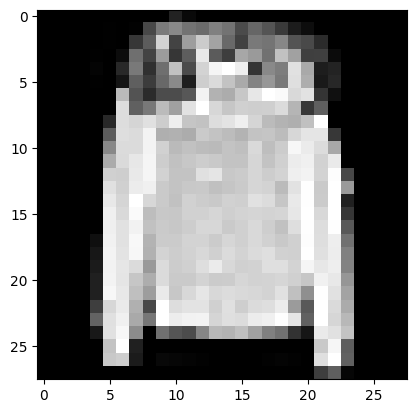

In [39]:
# TODO: try different number,
#       must be from 0 to 59999 for traing_data and from 0 to 9999 for testing_data
sample_image_index = 127

sample_image, sample_image_label = testing_data[sample_image_index]

print_FMNIST_label_name(sample_image_index, sample_image_label)
print()
show_FMNIST_image(sample_image)



logps = tensor([[ -7.7629,  -8.3942,  -1.2860,  -7.2746,  -0.4454, -10.6519,  -2.5969,
         -14.6740,  -4.9346, -11.9446]])
ps = tensor([[4.2523e-04, 2.2616e-04, 2.7638e-01, 6.9290e-04, 6.4055e-01, 2.3655e-05,
         7.4506e-02, 4.2380e-07, 7.1934e-03, 6.4939e-06]])
nps = [4.2523365e-04 2.2616470e-04 2.7637735e-01 6.9290464e-04 6.4054877e-01
 2.3654762e-05 7.4505515e-02 4.2379662e-07 7.1934005e-03 6.4939463e-06]


<BarContainer object of 10 artists>

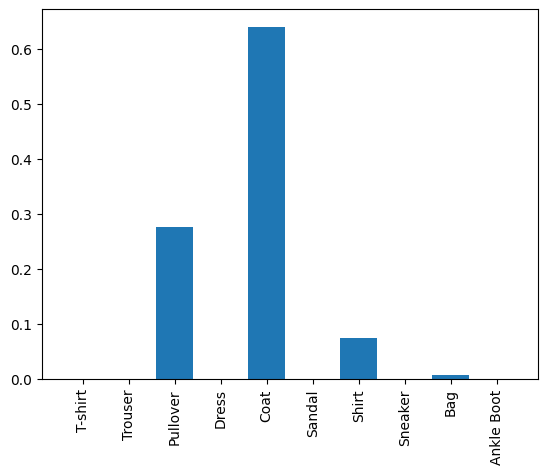

In [40]:
# Move model back to CPU
sequential_model_gpu.to("cpu")

with torch.no_grad(): # perform inference/evaluation without computing gradients or storing intermediate values
  logps = sequential_model_gpu(sample_image) # log probabilities

ps = torch.exp(logps) # probabilities

print("logps =", logps)
print("ps =", ps)

nps = ps.numpy()[0] # in numpy list
print("nps =", nps)

plt.xticks(np.arange(10), labels = FMNIST_labels_map, rotation = 'vertical')

plt.bar(np.arange(10), nps)

## Step Through Sequential Model

In [30]:
def print_weights(model, index):
  print(f"model[{index}].weight =>", model[index].weight)
  print(f"model[{index}].weight.grad =>", model[index].weight.grad)

In [31]:
torch.manual_seed(0)
np.random.seed(0)

train_dataloader = torch.utils.data.DataLoader(training_data,
                                               batch_size = 64,
                                               shuffle = False
                                              )

# Load one batch of training data
images, labels = next(iter(train_dataloader))

print("images.shape =", images.shape)

images.shape = torch.Size([64, 1, 28, 28])


In [32]:
mini_sequential_model = create_sequential_model()

criterion = nn.NLLLoss()
optimizer = optim.SGD(mini_sequential_model.parameters(), lr = 0.01)

print_weights(mini_sequential_model, 1)

model[1].weight => Parameter containing:
tensor([[-0.0294, -0.0263, -0.0138,  ...,  0.0021, -0.0198, -0.0150],
        [-0.0104, -0.0348,  0.0019,  ..., -0.0299, -0.0201,  0.0149],
        [-0.0333, -0.0204,  0.0268,  ...,  0.0080,  0.0160, -0.0330],
        ...,
        [ 0.0085, -0.0147, -0.0222,  ...,  0.0300, -0.0233, -0.0220],
        [-0.0064,  0.0175, -0.0286,  ..., -0.0158,  0.0309,  0.0066],
        [ 0.0125,  0.0280,  0.0030,  ..., -0.0105, -0.0321, -0.0053]],
       requires_grad=True)
model[1].weight.grad => None


In [33]:
output = mini_sequential_model(images)
loss = criterion(output, labels)
loss.backward()

print(f"loss.item() = {loss.item()} ")

print_weights(mini_sequential_model, 1)

loss.item() = 2.3056623935699463 
model[1].weight => Parameter containing:
tensor([[-0.0294, -0.0263, -0.0138,  ...,  0.0021, -0.0198, -0.0150],
        [-0.0104, -0.0348,  0.0019,  ..., -0.0299, -0.0201,  0.0149],
        [-0.0333, -0.0204,  0.0268,  ...,  0.0080,  0.0160, -0.0330],
        ...,
        [ 0.0085, -0.0147, -0.0222,  ...,  0.0300, -0.0233, -0.0220],
        [-0.0064,  0.0175, -0.0286,  ..., -0.0158,  0.0309,  0.0066],
        [ 0.0125,  0.0280,  0.0030,  ..., -0.0105, -0.0321, -0.0053]],
       requires_grad=True)
model[1].weight.grad => tensor([[-2.1404e-03, -2.1404e-03, -2.1404e-03,  ..., -2.1404e-03,
         -2.1404e-03, -2.1404e-03],
        [-1.1543e-03, -1.1543e-03, -1.1547e-03,  ..., -1.1902e-03,
         -1.1543e-03, -1.1543e-03],
        [ 5.4319e-04,  5.4319e-04,  5.4319e-04,  ...,  5.3597e-04,
          5.4319e-04,  5.4319e-04],
        ...,
        [-8.2744e-05, -8.2744e-05, -8.2744e-05,  ..., -8.2744e-05,
         -8.2744e-05, -8.2744e-05],
        [-1.953

In [34]:
optimizer.step()

print_weights(mini_sequential_model, 1)

model[1].weight => Parameter containing:
tensor([[-0.0294, -0.0263, -0.0137,  ...,  0.0021, -0.0198, -0.0150],
        [-0.0104, -0.0348,  0.0019,  ..., -0.0299, -0.0201,  0.0149],
        [-0.0333, -0.0204,  0.0268,  ...,  0.0080,  0.0160, -0.0330],
        ...,
        [ 0.0085, -0.0147, -0.0222,  ...,  0.0300, -0.0233, -0.0220],
        [-0.0064,  0.0175, -0.0286,  ..., -0.0158,  0.0309,  0.0066],
        [ 0.0126,  0.0280,  0.0030,  ..., -0.0105, -0.0320, -0.0053]],
       requires_grad=True)
model[1].weight.grad => tensor([[-2.1404e-03, -2.1404e-03, -2.1404e-03,  ..., -2.1404e-03,
         -2.1404e-03, -2.1404e-03],
        [-1.1543e-03, -1.1543e-03, -1.1547e-03,  ..., -1.1902e-03,
         -1.1543e-03, -1.1543e-03],
        [ 5.4319e-04,  5.4319e-04,  5.4319e-04,  ...,  5.3597e-04,
          5.4319e-04,  5.4319e-04],
        ...,
        [-8.2744e-05, -8.2744e-05, -8.2744e-05,  ..., -8.2744e-05,
         -8.2744e-05, -8.2744e-05],
        [-1.9531e-04, -1.9531e-04, -1.9531e-04,  

In [35]:
optimizer.zero_grad()

print_weights(mini_sequential_model, 1)

model[1].weight => Parameter containing:
tensor([[-0.0294, -0.0263, -0.0137,  ...,  0.0021, -0.0198, -0.0150],
        [-0.0104, -0.0348,  0.0019,  ..., -0.0299, -0.0201,  0.0149],
        [-0.0333, -0.0204,  0.0268,  ...,  0.0080,  0.0160, -0.0330],
        ...,
        [ 0.0085, -0.0147, -0.0222,  ...,  0.0300, -0.0233, -0.0220],
        [-0.0064,  0.0175, -0.0286,  ..., -0.0158,  0.0309,  0.0066],
        [ 0.0126,  0.0280,  0.0030,  ..., -0.0105, -0.0320, -0.0053]],
       requires_grad=True)
model[1].weight.grad => None


In [36]:
output = mini_sequential_model(images)
loss = criterion(output, labels)
loss.backward()
optimizer.step()

print(f"loss.item() = {loss.item()} ")
print_weights(mini_sequential_model, 1)

loss.item() = 2.298753261566162 
model[1].weight => Parameter containing:
tensor([[-0.0294, -0.0262, -0.0137,  ...,  0.0021, -0.0197, -0.0149],
        [-0.0104, -0.0348,  0.0019,  ..., -0.0299, -0.0201,  0.0149],
        [-0.0333, -0.0204,  0.0268,  ...,  0.0080,  0.0160, -0.0330],
        ...,
        [ 0.0085, -0.0147, -0.0222,  ...,  0.0300, -0.0233, -0.0220],
        [-0.0064,  0.0175, -0.0286,  ..., -0.0158,  0.0309,  0.0066],
        [ 0.0126,  0.0280,  0.0030,  ..., -0.0105, -0.0320, -0.0053]],
       requires_grad=True)
model[1].weight.grad => tensor([[-1.8133e-03, -1.8133e-03, -1.8133e-03,  ..., -1.8133e-03,
         -1.8133e-03, -1.8133e-03],
        [-1.9226e-03, -1.9226e-03, -1.9231e-03,  ..., -1.9591e-03,
         -1.9226e-03, -1.9226e-03],
        [ 7.7554e-04,  7.7554e-04,  7.7554e-04,  ...,  7.6840e-04,
          7.7554e-04,  7.7554e-04],
        ...,
        [-1.8676e-04, -1.8676e-04, -1.8676e-04,  ..., -1.8676e-04,
         -1.8676e-04, -1.8676e-04],
        [-8.7109

In [37]:
optimizer.zero_grad()
output = mini_sequential_model(images)
loss = criterion(output, labels)
loss.backward()
optimizer.step()

print(f"loss.item() = {loss.item()} ")
print_weights(mini_sequential_model, 1)

loss.item() = 2.2920784950256348 
model[1].weight => Parameter containing:
tensor([[-0.0293, -0.0262, -0.0137,  ...,  0.0021, -0.0197, -0.0149],
        [-0.0104, -0.0347,  0.0019,  ..., -0.0299, -0.0201,  0.0150],
        [-0.0333, -0.0204,  0.0268,  ...,  0.0080,  0.0160, -0.0330],
        ...,
        [ 0.0085, -0.0147, -0.0222,  ...,  0.0300, -0.0233, -0.0220],
        [-0.0064,  0.0175, -0.0286,  ..., -0.0158,  0.0309,  0.0066],
        [ 0.0126,  0.0280,  0.0030,  ..., -0.0105, -0.0320, -0.0053]],
       requires_grad=True)
model[1].weight.grad => tensor([[-2.0565e-03, -2.0565e-03, -2.0565e-03,  ..., -2.0565e-03,
         -2.0565e-03, -2.0565e-03],
        [-2.1945e-03, -2.1945e-03, -2.1946e-03,  ..., -2.2252e-03,
         -2.1945e-03, -2.1945e-03],
        [ 6.1415e-04,  6.1415e-04,  6.1415e-04,  ...,  6.1534e-04,
          6.1415e-04,  6.1415e-04],
        ...,
        [ 9.6562e-05,  9.6562e-05,  9.6562e-05,  ...,  9.6562e-05,
          9.6562e-05,  9.6562e-05],
        [ 6.552

In [38]:
print(mini_sequential_model[0])
print(mini_sequential_model[1])
print(mini_sequential_model[2])
print(mini_sequential_model[3])
print(mini_sequential_model[4])
print(mini_sequential_model[5])
print(mini_sequential_model[6])


Flatten(start_dim=1, end_dim=-1)
Linear(in_features=784, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=10, bias=True)
LogSoftmax(dim=1)
